Week 1 Code Sample Assignment
Please modify the aging buckets high/low amounts in order to get a different result for the output. Upload your modified notebook to canvas for the first assignment. 

In [21]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [22]:
# this cell will be to generate the synthetic data 

# set the number of departments/units
n_units = 5
business_units = [f"Unit {i+1}" for i in range(n_units)]
np.random.seed(42)  # for reproducibility - helps with random data generation

# define the aging buckets for the receivables and monetary amounts
aging_buckets = {
    'Current': (50000, 4000000),
    '1-30 Days': (10000, 20000000),
    '31-60 Days': (10000, 6000000),
    '61-90 Days': (10000, 7000000),
    '91-120 Days': (50000, 4000000),
    '121-365': (10000, 3000000),
    'Over 365 Days': (1000, 2000000),
    'Unapplied Payments': (-10000, -6000),
    # the are the number of invoices per bucket
    '# of Invoices': (100, 5000)
}

# generate the data from parameters
data = {'Business Unit': business_units}
for bucket, (low, high) in aging_buckets.items():
    if bucket == '# of Invoices':
        data[bucket] = np.random.randint(low, high, n_units)
    else:
        data[bucket] = np.round(np.random.uniform(low, high, n_units), 2)

df = pd.DataFrame(data)
df['Total Due'] = df[['Current', '1-30 Days', '31-60 Days', '61-90 Days','91-120 Days', '121-365', 'Over 365 Days']].sum(axis=1)
df['Net Amount Due'] = df['Total Due'] + df['Unapplied Payments']


# show the dataframe
df.head()


,Business Unit,Current,1-30 Days,31-60 Days,61-90 Days,91-120 Days,121-365,Over 365 Days,Unapplied Payments,# of Invoices,Total Due,Net Amount Due
0,Unit 1,1529433.47,3128330.46,133301.12,1291997.52,2466818.93,2357676.12,1215482.16,-6766.41,1578,12123039.78,12116273.37
1,Unit 2,3805321.51,1171091.41,5819760.01,2136653.28,601000.75,607024.61,341877.72,-8781.54,2656,14482729.29,14473947.75
2,Unit 3,2941376.07,17324861.15,4996331.42,3678047.46,1203971.36,1547560.97,131038.13,-9609.31,875,31823186.56,31813577.25
3,Unit 4,2414701.01,12026289.08,1281911.27,3029295.68,1497129.28,1781319.56,1897822.19,-7263.07,4114,23928468.07,23921205.00
4,Unit 5,666273.63,14164370.83,1099131.55,2045691.69,1851476.44,148886.73,1931298.43,-8239.39,134,21907129.30,21898889.91


In [23]:
# calculate present value of the receivables to show how much money we are losing
discount_rate = 0.05  # 5% discount rate

# map the buckets to months
aging_buckets = {
    'Current': 0,
    '1-30 Days': 1,
    '31-60 Days': 2,
    '61-90 Days': 3,
    '91-120 Days': 4,
    '121-365': 8,
    'Over 365 Days': 18,
}

# calcualte the present value for each bucket
for bucket, months in aging_buckets.items():
    df[f'{bucket} PV'] = df[bucket] / ((1 + discount_rate) ** (months))

# calculate the total present value
df['Total PV'] = df[[f'{bucket} PV' for bucket in aging_buckets]].sum(axis=1)


#show results of present value
df[['Business Unit', 'Total Due', 'Total PV']]

,Business Unit,Total Due,Total PV
0,Unit 1,12123039.78,9.876064e+06
1,Unit 2,14482729.29,1.309242e+07
2,Unit 3,31823186.56,2.924271e+07
3,Unit 4,23928468.07,2.087380e+07
4,Unit 5,21907129.30,1.934672e+07


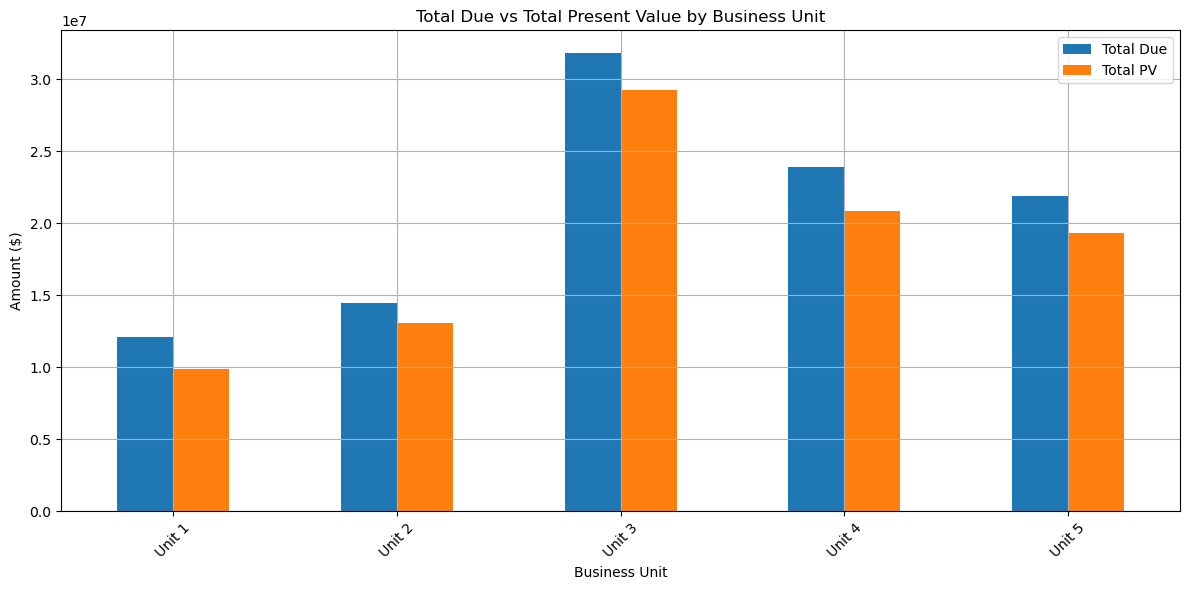

In [24]:
# lets plot and print the results
df.plot(x= 'Business Unit', y=['Total Due', 'Total PV'], kind='bar', figsize=(12, 6), title='Total Due vs Total Present Value by Business Unit')
#plt.title('Total Due vs Total Present Value by Business Unit')
plt.ylabel('Amount ($)')
plt.xlabel('Business Unit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()